In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Hymn Trainer - {{ hymn_title }}</title>
    <script src="https://cdn.jsdelivr.net/npm/opensheetmusicdisplay@1.1.0/build/opensheetmusicdisplay.min.js"></script>
    <style>
        :root {
            --bg: #121212;
            --card: #1e1e1e;
            --text: #e0e0e0;
            --accent-on: #00e676;
            --accent-off: #ff5252;
            --info: #2196f3;
            --highlight: #ffd740;
            --sidebar-width: 280px;
            --warning: #ffa000;
        }

        body { 
            font-family: 'Inter', system-ui, sans-serif; 
            background: var(--bg); 
            color: var(--text); 
            margin: 0;
            height: 100vh;
            display: flex;
            overflow: hidden; 
        }

        /* --- Sidebar Styles --- */
        #hymn-sidebar {
            width: var(--sidebar-width);
            background: #181818;
            border-right: 1px solid #333;
            display: flex;
            flex-direction: column;
            flex-shrink: 0;
        }

        .sidebar-header {
            padding: 20px;
            font-size: 0.9rem;
            font-weight: bold;
            color: var(--info);
            border-bottom: 1px solid #333;
        }

        .hymn-list {
            overflow-y: auto;
            flex-grow: 1;
        }

        .hymn-link {
            display: block;
            padding: 12px 20px;
            color: #bbb;
            text-decoration: none;
            border-bottom: 1px solid #252525;
            transition: 0.2s;
        }

        .hymn-link:hover {
            background: #252525;
            color: var(--highlight);
        }

        .hymn-link.active {
            background: rgba(33, 150, 243, 0.1);
            color: var(--info);
            border-left: 4px solid var(--info);
        }

        .hymn-link-title {
            font-weight: bold;
            display: block;
            text-transform: uppercase;
            font-size: 0.85rem;
        }

        .hymn-link-meta {
            font-size: 0.7rem;
            opacity: 0.6;
        }

        /* --- Main Content Area --- */
        .container { 
            flex-grow: 1;
            height: 100vh;
            padding: 15px; 
            display: flex;
            flex-direction: column;
            gap: 10px;
            box-sizing: border-box;
        }

        header { 
            display: flex; 
            justify-content: space-between; 
            align-items: center; 
            padding-bottom: 8px;
            border-bottom: 1px solid #333;
        }

        .hymn-meta { display: flex; gap: 10px; }

        .badge {
            font-size: 0.7rem;
            padding: 2px 8px;
            border-radius: 4px;
            background: rgba(33, 150, 243, 0.1);
            border: 1px solid rgba(33, 150, 243, 0.3);
            color: var(--info);
            text-transform: uppercase;
        }
        
        #status { font-size: 0.7rem; padding: 4px 8px; border-radius: 4px; font-weight: bold; }
        .ready { background: #1b5e20; color: #a5d6a7; border: 1px solid #2e7d32; }
        .waiting { background: #3e2723; color: #d7ccc8; border: 1px solid #4e342e; }
        .error { background: #b71c1c; color: #ffcdd2; border: 1px solid #d32f2f; }
        .no-device { background: var(--warning); color: #000; }

        .trainer-box {
            background: var(--card);
            padding: 15px;
            border-radius: 12px;
            border: 1px solid #333;
            text-align: center;
            flex-grow: 1; 
            display: flex;
            flex-direction: column;
            overflow: hidden;
            position: relative;
            min-height: 300px;
        }

        /* Audio Overlay */
        #audio-unlock {
            position: absolute;
            top: 0; left: 0; width: 100%; height: 100%;
            background: rgba(0,0,0,0.8);
            z-index: 10;
            display: flex;
            justify-content: center;
            align-items: center;
            border-radius: 12px;
        }
        
        #audio-unlock button {
            padding: 15px 30px;
            background: var(--info);
            border: none;
            color: white;
            border-radius: 8px;
            cursor: pointer;
            font-weight: bold;
        }

        .chord-display { font-size: 1.6rem; font-weight: bold; color: var(--highlight); margin: 5px 0; }
        
        #music-container {
            background: white;
            border-radius: 8px;
            flex-grow: 1;
            overflow-y: auto;
            margin: 10px 0;
        }

        .display-grid { 
            display: grid; 
            grid-template-columns: 1fr 2fr; 
            gap: 10px; 
            height: 110px; 
        }

        .footer-card {
            background: #000;
            border-radius: 6px;
            padding: 8px;
            border: 1px solid #333;
            overflow: hidden;
            display: flex;
            flex-direction: column;
        }

        h3 { margin: 0 0 5px 0; font-size: 0.7rem; color: var(--info); text-transform: uppercase; }

        #active-keys-display { 
            font-size: 1rem; 
            color: var(--accent-on);
            flex-grow: 1;
            display: flex;
            align-items: center;
            justify-content: center;
            font-family: 'JetBrains Mono', monospace;
        }

        #log { 
            flex-grow: 1;
            overflow-y: auto; 
            font-family: 'JetBrains Mono', monospace; 
            font-size: 0.7rem; 
        }
    </style>
</head>
<body>

<nav id="hymn-sidebar">
    <div class="sidebar-header">HYMN LIBRARY</div>
    <div class="hymn-list">
        {% for hymn in all_hymns %}
        <a href="?hymn={{ hymn.title }}" class="hymn-link {% if hymn.title == hymn_title %}active{% endif %}">
            <span class="hymn-link-title">{{ hymn.title }}</span>
            <span class="hymn-link-meta">{{ hymn.Tune|truncatechars:20 }} | {{ hymn.Key }}</span>
        </a>
        {% endfor %}
    </div>
</nav>

<div class="container">
    <header>

<title>Learn {{ hymn_title }} - FullChoir MIDI Trainer</title>
    <meta name="description" content="Practice the hymn {{ hymn_title }} (Tune: {{ tune }}) in {{ key_signature }} using our interactive MIDI piano trainer.">
    
    <link rel="canonical" href="https://www.fullchoir.com/?hymn={{ hymn_title }}" />


        <div>
            <h1 style="font-size: 1rem; margin-bottom: 4px;">{{ hymn_title|upper }}</h1>
            <div class="hymn-meta">
                <span class="badge">Tune: {{ tune|default:"Unknown" }}</span>
                <span class="badge">Key: {{ key_signature|default:"--" }}</span>
            </div>
        </div>
        <div id="status" class="waiting">SCANNING FOR MIDI...</div>
    </header>

    <div class="trainer-box">
        <div id="audio-unlock">
            <button onclick="enableAudio()">ENABLE AUDIO TO START</button>
        </div>

        <div id="progress-tracker" style="font-size: 0.8rem; opacity: 0.7;">Step 1</div>
        <div class="chord-display" id="target-chord">Loading...</div>
        
        <div id="music-container"></div>
        
        <div style="font-size: 0.7rem; opacity: 0.6;">Play the notes shown above on your MIDI controller</div>
    </div>

    <div class="display-grid">
        <div class="footer-card">
            <h3>Keys Pressed</h3>
            <div id="active-keys-display">--</div>
        </div>

        <div class="footer-card">
            <h3>Activity Log</h3>
            <div id="log"></div>
        </div>
    </div>
</div>


</script>
<script>
    // 1. Audio Engine
    const audioCtx = new (window.AudioContext || window.webkitAudioContext)();
    const activeOscillators = {};

    function enableAudio() {
        audioCtx.resume().then(() => {
            document.getElementById('audio-unlock').style.display = 'none';
            logActivity("Audio Engine Started");
        });
    }

    function playNote(midiNumber) {
        stopNote(midiNumber); // Safety cleanup

        const osc = audioCtx.createOscillator();
        const gain = audioCtx.createGain();

        // Organ-like sound (Triangle wave is softer than Sawtooth)
        osc.type = 'triangle'; 
        osc.frequency.setValueAtTime(440 * Math.pow(2, (midiNumber - 69) / 12), audioCtx.currentTime);

        gain.gain.setValueAtTime(0, audioCtx.currentTime);
        gain.gain.linearRampToValueAtTime(0.2, audioCtx.currentTime + 0.02); // Attack
        
        osc.connect(gain);
        gain.connect(audioCtx.destination);

        osc.start();
        activeOscillators[midiNumber] = { osc, gain };
    }

    function stopNote(midiNumber) {
        if (activeOscillators[midiNumber]) {
            const { osc, gain } = activeOscillators[midiNumber];
            gain.gain.exponentialRampToValueAtTime(0.0001, audioCtx.currentTime + 0.1); // Release
            osc.stop(audioCtx.currentTime + 0.15);
            delete activeOscillators[midiNumber];
        }
    }

    // 2. Data Injection
    const musicXml = `{{ xml_data|escapejs }}`;
    const rawProgression = JSON.parse('{{ progression_json|safe }}');
    
    function cleanArtifacts(text) {
        if (typeof text !== 'string') return text;
        return text.replace(/Instr\.\s*\S+/g, '').trim();
    }

    const progression = rawProgression.map(item => ({ 
        notes: item[0].map(n => cleanArtifacts(n)), 
        duration: item[1] 
    }));

    // 3. OSMD Config
    const osmd = new opensheetmusicdisplay.OpenSheetMusicDisplay("music-container", {
        drawTitle: false, drawComposer: false, drawMeasureNumbers: false, 
        autoResize: true, drawPartNames: false, drawPartAbbreviations: false
    });

    function renderStaff() {
        if (musicXml.length > 50) {
            osmd.load(musicXml).then(() => osmd.render());
        }
    }

    // 4. Application State
    let currentStep = 0;
    let activeNotes = new Set();
    const SHARP_TO_FLAT = { 'C#': 'Db', 'D#': 'Eb', 'F#': 'Gb', 'G#': 'Ab', 'A#': 'Bb' };
    const NOTE_NAMES_SHARP = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"];

    const logEl = document.getElementById('log');
    const statusEl = document.getElementById('status');
    const targetChordEl = document.getElementById('target-chord');
    const progressEl = document.getElementById('progress-tracker');
    const activeKeysEl = document.getElementById('active-keys-display');

    function normalizeNote(noteStr) {
        let clean = cleanArtifacts(noteStr).replace('-', 'b'); 
        let nameMatch = clean.match(/[A-G][b#]?/);
        let octaveMatch = clean.match(/\d+/);
        if (!nameMatch || !octaveMatch) return clean;
        let name = nameMatch[0], octave = octaveMatch[0];
        if (SHARP_TO_FLAT[name]) name = SHARP_TO_FLAT[name];
        return `${name}${octave}`;
    }

    function getMidiNoteName(midiNumber) {
        const name = NOTE_NAMES_SHARP[midiNumber % 12];
        const octave = Math.floor(midiNumber / 12) - 1;
        return `${SHARP_TO_FLAT[name] || name}${octave}`;
    }

    function updateTrainerUI() {
        if (currentStep >= progression.length) {
            targetChordEl.innerText = "🎉 Hymn Complete!";
            return;
        }
        const chord = progression[currentStep];
        targetChordEl.innerText = chord.notes.map(n => cleanArtifacts(n).replace('-', 'b')).join(' ');
        progressEl.innerText = `Chord ${currentStep + 1} of ${progression.length}`;
    }

    function checkChord() {
        if (currentStep >= progression.length) return;
        const targetNotes = progression[currentStep].notes.map(normalizeNote);
        if (targetNotes.every(note => activeNotes.has(note))) {
            currentStep++;
            updateTrainerUI();
        }
    }

    function logActivity(msg) {
        const entry = document.createElement('div');
        entry.textContent = `[${new Date().toLocaleTimeString()}] ${msg}`;
        logEl.prepend(entry);
    }

    // 5. MIDI Logic
    function initMIDI() {
        if (!navigator.requestMIDIAccess) {
            statusEl.innerText = "BROWSER UNSUPPORTED";
            statusEl.className = "error";
            return;
        }

        navigator.requestMIDIAccess().then(midi => {
            function updateDevices() {
                const inputs = Array.from(midi.inputs.values());
                if (inputs.length > 0) {
                    statusEl.innerText = `MIDI READY: ${inputs[0].name}`;
                    statusEl.className = "ready";
                    
                    inputs.forEach(input => {
                        input.onmidimessage = (e) => {
                            const [cmd, note, vel] = e.data;
                            const name = getMidiNoteName(note);

                            // Note On (144)
                            if (cmd === 144 && vel > 0) { 
                                playNote(note);
                                activeNotes.add(name); 
                                checkChord(); 
                            } 
                            // Note Off (128)
                            else if (cmd === 128 || (cmd === 144 && vel === 0)) { 
                                stopNote(note);
                                activeNotes.delete(name); 
                            }
                            activeKeysEl.innerText = Array.from(activeNotes).join(', ') || '--';
                        };
                    });
                } else {
                    statusEl.innerText = "NO DEVICE DETECTED";
                    statusEl.className = "no-device";
                }
            }

            updateDevices();
            midi.onstatechange = (e) => updateDevices();

        }).catch(err => {
            statusEl.innerText = "MIDI ACCESS DENIED";
            statusEl.className = "error";
        });
    }

    // Start
    renderStaff();
    updateTrainerUI();
    initMIDI();

    window.addEventListener('resize', () => osmd.render());



</script>


<script type="application/ld+json">
{
  "@context": "https://schema.org",
  "@type": "LearningResource",
  "name": "{{ hymn_title }} Hymn Trainer",
  "description": "Learn to play {{ hymn_title }} on the piano using MIDI feedback.",
  "learningResourceType": "Interactive Tutorial"
}
</script>


</body>
</html>


1

In [ ]:
11

: 

In [4]:
from music21 import environment

# Connect to your settings file
us = environment.UserSettings()

# Set the path to your new MuseScore 4 installation
mscore_path = r'C:\Program Files\MuseScore 4\bin\MuseScore4.exe'

us['musicxmlPath'] = mscore_path
us['musescoreDirectPNGPath'] = mscore_path

print("Successfully linked MuseScore 4 to music21!")

Successfully linked MuseScore 4 to music21!


In [1]:
21

21

In [2]:
from music21 import *

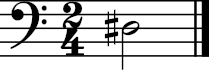

In [3]:
n = note.Note("D#3")
n.duration.type = 'half'
n.show()

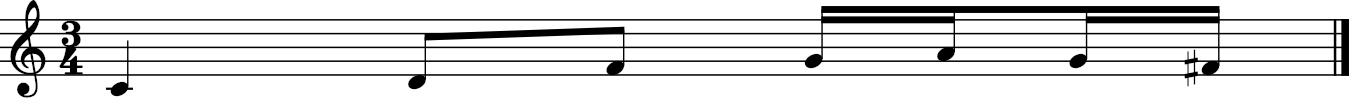

In [7]:
littleMelody = converter.parse("tinynotation: 3/4 c4 d8 f g16 a g f#")
littleMelody.show()

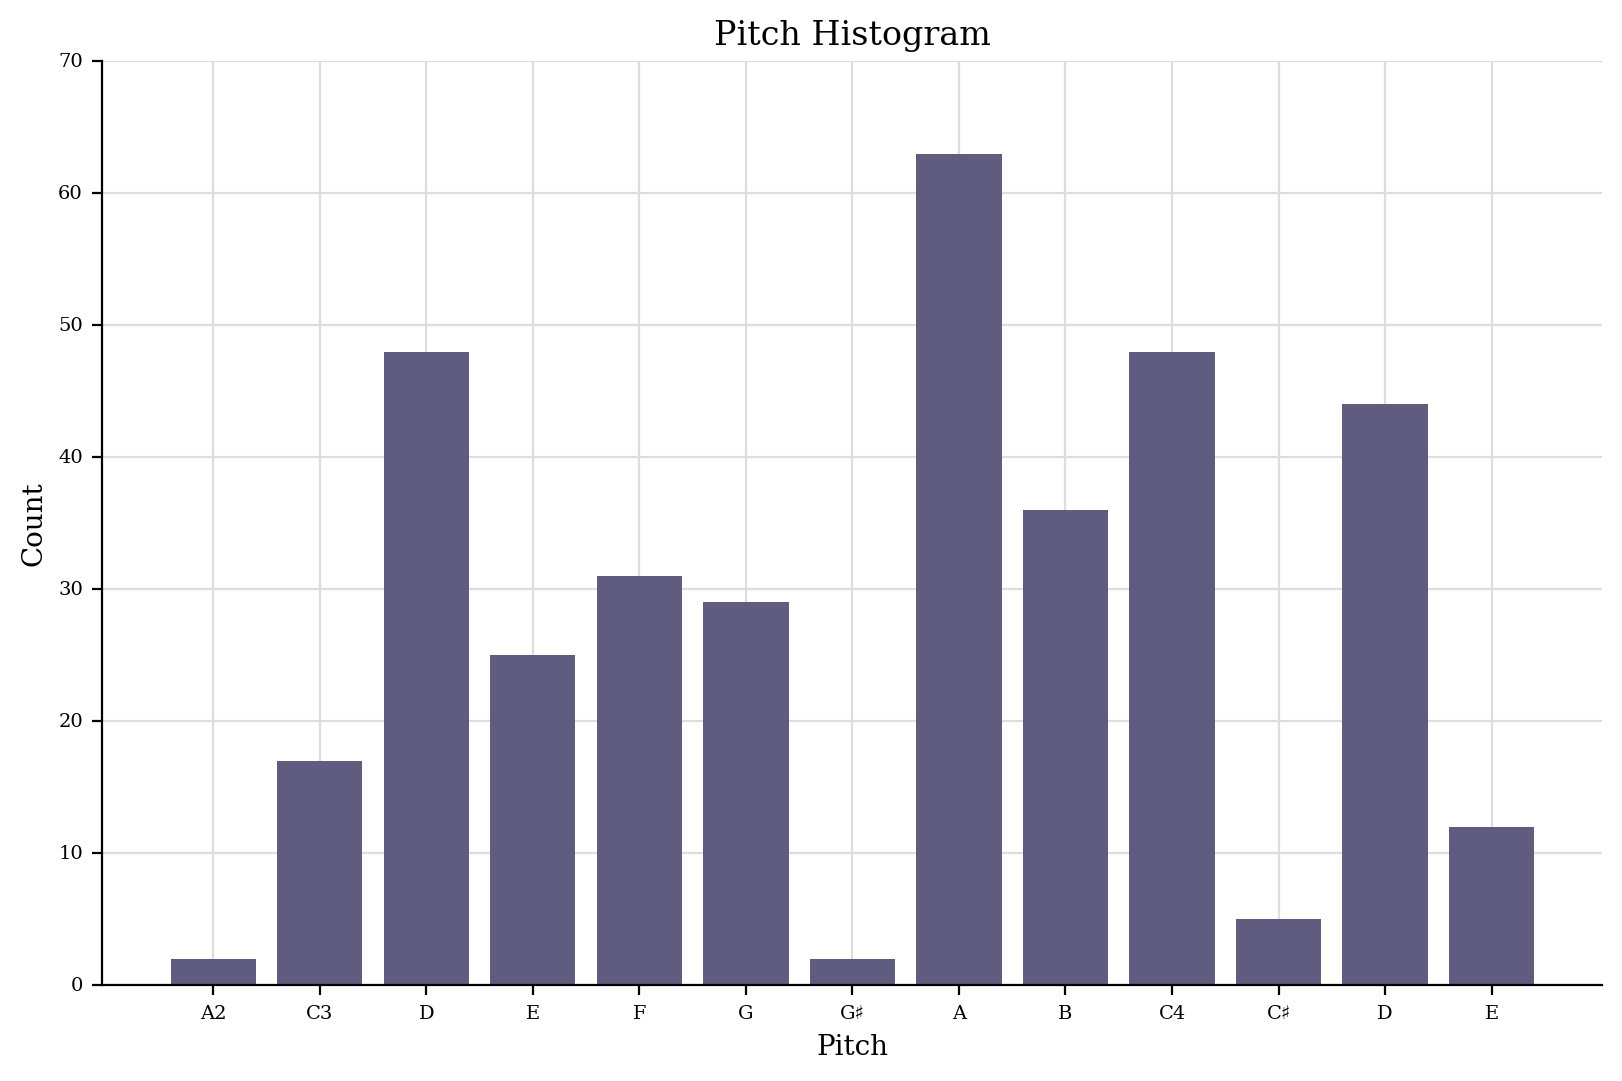

In [8]:
dicant = corpus.parse('trecento/Fava_Dicant_nunc_iudei')
dicant.plot('histogram', 'pitch')

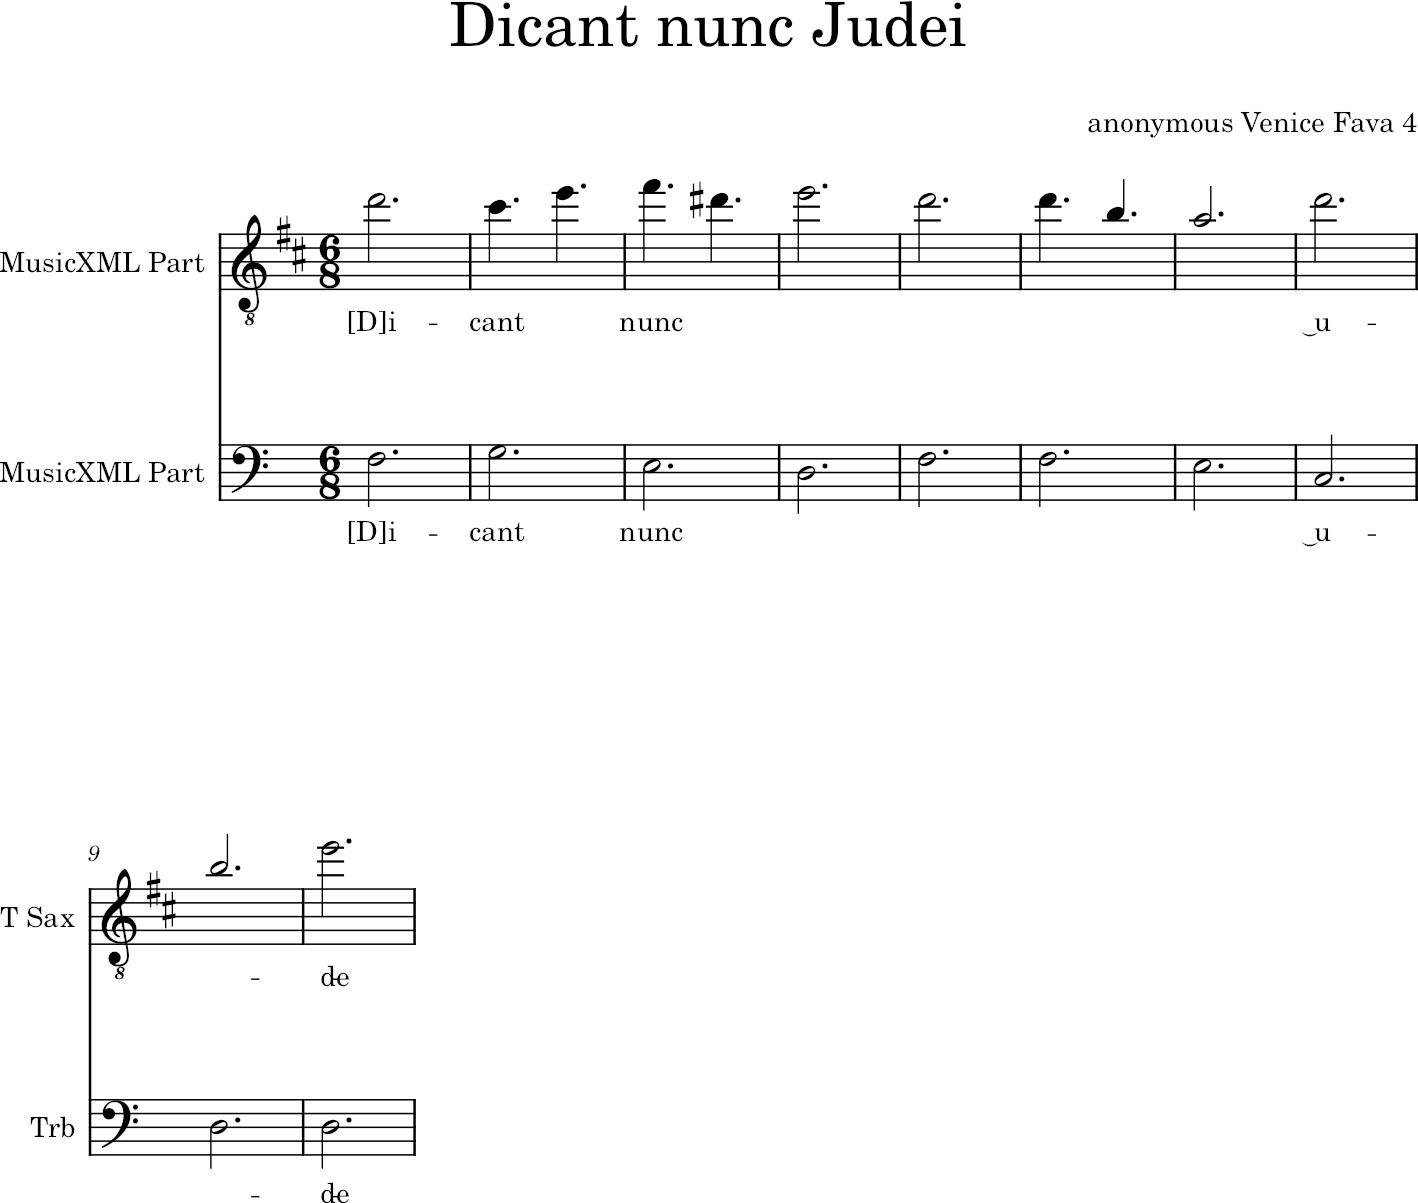

In [9]:
dicant.measures(1, 10).show()

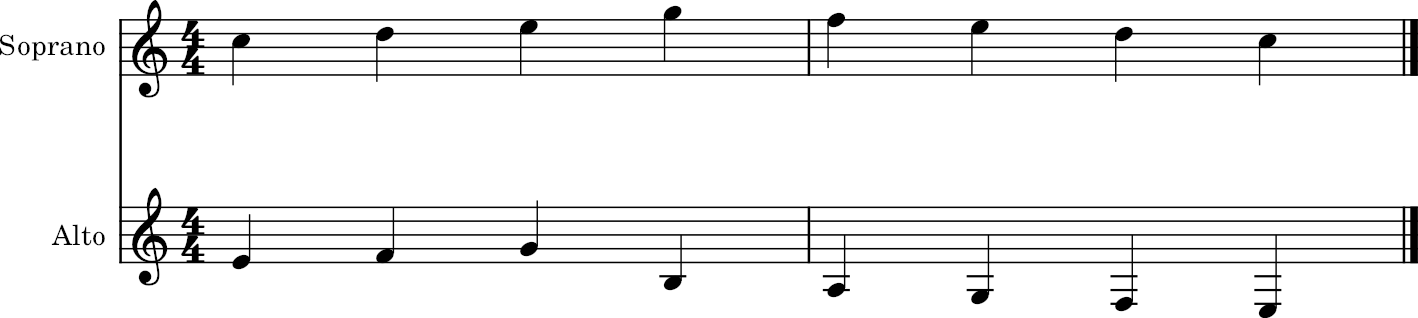

In [6]:
from music21 import stream, note, chord, meter, key, instrument

# 1. Initialize the Score and Parts
score = stream.Score()
soprano_part = stream.Part()
alto_part = stream.Part()

# Assign instruments
soprano_part.insert(0, instrument.Soprano())
alto_part.insert(0, instrument.Alto())

# 2. Add Time and Key Signatures
soprano_part.append(meter.TimeSignature('4/4'))
soprano_part.append(key.KeySignature(0)) # C Major
alto_part.append(meter.TimeSignature('4/4'))
alto_part.append(key.KeySignature(0))

# 3. Create the Melodies
# Soprano: Ascending C major scale fragment
s_notes = ['C5', 'D5', 'E5', 'G5', 'F5', 'E5', 'D5', 'C5']
# Alto: Descending/Supporting line
a_notes = ['E4', 'F4', 'G4', 'B3', 'A3', 'G3', 'F3', 'E3']

for n in s_notes:
    soprano_part.append(note.Note(n, quarterLength=1.0))

for n in a_notes:
    alto_part.append(note.Note(n, quarterLength=1.0))

# 4. Assemble the Score
score.insert(0, soprano_part)
score.insert(0, alto_part)

# 5. Display the Sheet Music
# This will open your default MusicXML viewer (like MuseScore or Finale)
score.show()

{0.0} <music21.stream.Part 0x1c0fc283b10>
    {0.0} <music21.stream.Measure 1 offset=0.0>
        {0.0} <music21.stream.Voice 1>
            {0.0} <music21.note.Note C>
        {0.0} <music21.stream.Voice 2>
            {0.0} <music21.note.Note E>
    {0.0} <music21.clef.TrebleClef>
    {0.0} <music21.meter.TimeSignature 4/4>


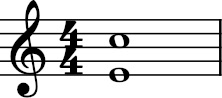

In [9]:
from music21 import stream, note, meter, key, clef

# 1. Create the container
score = stream.Score()
staff = stream.Part()

# 2. Add basic setup to the staff
staff.append(clef.TrebleClef())
staff.append(meter.TimeSignature('4/4'))

# 3. Create a Measure object manually 
# This is often the "missing link" for empty staves
m1 = stream.Measure(number=1)

# 4. Create the Voices
soprano_voice = stream.Voice(id='1')
alto_voice = stream.Voice(id='2')

# 5. Define notes (Soprano: C5, Alto: E4)
s_note = note.Note('C5', type='whole')
a_note = note.Note('E4', type='whole')

# 6. Build the hierarchy: Notes -> Voices -> Measure -> Part
soprano_voice.append(s_note)
alto_voice.append(a_note)

m1.insert(0, soprano_voice)
m1.insert(0, alto_voice)

staff.append(m1)
score.append(staff)

# 7. Final check: print the structure to your console
score.show('text') 

# 8. Render the sheet music
score.show()

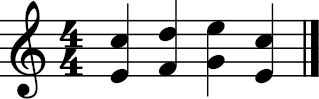

In [12]:
from music21 import stream, note, chord, meter

# 1. Create the container
staff = stream.Part()
staff.append(meter.TimeSignature('4/4'))

# 2. Define pitch pairs (Soprano and Alto)
# Each tuple represents the notes sounding together
pitch_pairs = [('E4', 'C5'), ('F4', 'D5'), ('G4', 'E5'), ('E4', 'C5')]

# 3. Create Chord objects and add them to the staff
for pair in pitch_pairs:
    # Create a chord from the list/tuple of pitches
    c = chord.Chord(pair)
    c.quarterLength = 1.0
    staff.append(c)

# 4. Display
staff.show()

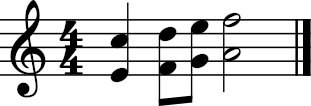

In [13]:
from music21 import stream, chord, meter

# 1. Setup the staff
staff = stream.Part()
staff.append(meter.TimeSignature('4/4'))

# 2. Define data: (Pitches, Duration)
# 1.0 = Quarter, 0.5 = Eighth, 2.0 = Half
music_data = [
    (['E4', 'C5'], 1.0), 
    (['F4', 'D5'], 0.5), 
    (['G4', 'E5'], 0.5), 
    (['A4', 'F5'], 2.0)
]

# 3. Build the chords
for pitches, duration in music_data:
    c = chord.Chord(pitches)
    c.quarterLength = duration
    staff.append(c)

# 4. Clean up and show
staff.makeMeasures(inPlace=True)
staff.show()

In [ ]:
from music21 import stream, note, chord, meter, clef, layout

# 1. Create the Main Score
score = stream.Score()

# 2. Setup the Top Staff (Soprano/Alto)
top_staff = stream.Part()
top_staff.append(clef.TrebleClef())
top_staff.append(meter.TimeSignature('4/4'))

# 3. Setup the Bottom Staff (Bass)
bottom_staff = stream.Part()
bottom_staff.append(clef.BassClef())
bottom_staff.append(meter.TimeSignature('4/4'))

# 4. Data for our music
# (Upper Pitches, Bass Pitch, Duration)
music_data = [
    (['E4', 'C5'], 'C3', 1.0),
    (['F4', 'D5'], 'G2', 1.0),
    (['G4', 'E5'], 'A2', 1.0),
    (['A4', 'F5'], 'F2', 1.0)
]

# 5. Distribute notes to their respective staves
for upper, lower, dur in music_data:
    # Add chord to top staff
    c_upper = chord.Chord(upper)
    c_upper.quarterLength = dur
    top_staff.append(c_upper)
    
    # Add single note to bottom staff
    n_lower = note.Note(lower)
    n_lower.quarterLength = dur
    bottom_staff.append(n_lower)

# 6. Organization: Wrap everything in measures
top_staff.makeMeasures(inPlace=True)
bottom_staff.makeMeasures(inPlace=True)

# 7. Assemble and Show
score.insert(0, top_staff)
score.insert(0, bottom_staff)

score.show()

ValueError: not enough values to unpack (expected 3, got 2)

In [3]:
import json

def get_hymn_notes(file_path, hymn_number):
    """
    Retrieves the 'Notes' content for a specific hymn title.
    Example hymn_number: 'mhb105'
    """
    try:
        with open(file_path, 'r') as file:
            data = json.load(file)
            
            # Iterate through the list to find the matching title
            for hymn in data:
                if hymn.get("title") == hymn_number:
                    return hymn.get("Notes")
            
            return f"Hymn {hymn_number} not found."
            
    except FileNotFoundError:
        return "Error: The file path provided was not found."
    except json.JSONDecodeError:
        return "Error: Failed to decode JSON. Check file formatting."

# Your specific file path
path = r"C:\Users\Asamoah\Desktop\kofi\aseda_a\adom\static\hymns.json"

# Example usage:
hymn_to_find = "mhb442"
notes = get_hymn_notes(path, hymn_to_find)

print(f"Notes for {hymn_to_find}:")
print(notes)
note_bank = notes

Notes for mhb442:
[['F4 1.0', 'D-4 1.0', 'A-3 1.0', 'D-3 1.0'], ['F4 1.0', 'D-4 1.0', 'A-3 1.0', 'D-3 1.0'], ['F4 1.0', 'D-4 1.0', 'A-3 1.0', 'D-3 1.0'], ['E-4 2.0', 'C4 2.0', 'G-3 2.0', 'A-3 2.0'], ['F4 1.0', 'D-4 1.0', 'A-3 1.0', 'D-3 1.0'], ['A-4 2.0', 'D-4 2.0', 'B-3 2.0', 'E-3 2.0'], ['G-4 1.0', 'E-4 1.0', 'A-3 1.0', 'A-2 1.0'], ['F4 3.0', 'D-4 3.0', 'A-3 3.0', 'D-3 3.0'], ['A-4 1.0', 'F4 1.0', 'D-4 1.0', 'D-3 1.0'], ['A-4 1.0', 'F4 1.0', 'D-4 1.0', 'D-3 1.0'], ['A4 1.0', 'F4 1.0', 'E-4 1.0', 'C3 1.0'], ['B-4 2.0', 'F4 2.0', 'D4 2.0', 'B-2 2.0'], ['D4 1.0', 'F4 1.0', 'B-3 1.0', 'B-2 1.0'], ['G-4 3.0', 'E-4 3.0', 'B-3 3.0', 'E-3 3.0'], ['C5 1.0', 'G-4 1.0', 'C4 1.0', 'A-2 1.0'], ['C5 1.0', 'G-4 1.0', 'E-4 1.0', 'A-2 1.0'], ['B-4 1.0', 'G-4 1.0', 'D-4 1.0', 'A-2 1.0'], ['G-4 2.0', 'A-4 2.0', 'C4 1.0', 'A-2 1.0'], ['D-4 1.0', 'B-2 1.0'], ['G-4 1.0', 'A-4 1.0', 'E-4 1.0', 'C3 1.0'], ['A-4 1.0', 'F4 1.0', 'D-4 2.0', 'D-3 2.0'], ['F5 1.0', 'A-4 1.0'], ['E-5 1.0', 'A-4 1.0', 'C4 1.0', 'E

In [4]:
def normalize_music_durations(data):
    final_result = []
    
    for sublist in data:
        # Convert strings like 'F4 1.0' into lists like ['F4', 1.0]
        parsed_notes = []
        for item in sublist:
            note, duration = item.rsplit(' ', 1)
            parsed_notes.append([note, float(duration)])
            
        current_working_notes = parsed_notes
        
        # Process the current group until all surplus is handled
        while current_working_notes:
            durations = [n[1] for n in current_working_notes]
            min_dur = min(durations)
            max_dur = max(durations)
            
            # If all durations are already the same
            if min_dur == max_dur:
                final_result.append([f"{n[0]} {n[1]}" for n in current_working_notes])
                break
            else:
                # Create the normalized sublist using the minimum duration
                normalized_sublist = []
                surplus_list = []
                
                for note, dur in current_working_notes:
                    normalized_sublist.append(f"{note} {min_dur}")
                    
                    # Calculate remaining duration for the next sublist
                    remainder = dur - min_dur
                    if remainder > 0:
                        surplus_list.append([note, remainder])
                
                final_result.append(normalized_sublist)
                # The surplus becomes the notes for the next iteration
                current_working_notes = surplus_list
                
    return final_result

# Example usage
music_data = [
    ['F4 1.0', 'D-4 1.0', 'A-3 1.0', 'D-3 1.0'], 
    ['F4 1.0', 'D-4 1.0', 'A-3 2.0', 'D-3 1.0'], 
    ['F4 1.0', 'D-4 1.0', 'A-3 1.0', 'D-3 1.0']
]
music_data = note_bank

result = normalize_music_durations(music_data)

# Print result
for sub in result:
    print(sub)

music_hat = result

['F4 1.0', 'D-4 1.0', 'A-3 1.0', 'D-3 1.0']
['F4 1.0', 'D-4 1.0', 'A-3 1.0', 'D-3 1.0']
['F4 1.0', 'D-4 1.0', 'A-3 1.0', 'D-3 1.0']
['E-4 2.0', 'C4 2.0', 'G-3 2.0', 'A-3 2.0']
['F4 1.0', 'D-4 1.0', 'A-3 1.0', 'D-3 1.0']
['A-4 2.0', 'D-4 2.0', 'B-3 2.0', 'E-3 2.0']
['G-4 1.0', 'E-4 1.0', 'A-3 1.0', 'A-2 1.0']
['F4 3.0', 'D-4 3.0', 'A-3 3.0', 'D-3 3.0']
['A-4 1.0', 'F4 1.0', 'D-4 1.0', 'D-3 1.0']
['A-4 1.0', 'F4 1.0', 'D-4 1.0', 'D-3 1.0']
['A4 1.0', 'F4 1.0', 'E-4 1.0', 'C3 1.0']
['B-4 2.0', 'F4 2.0', 'D4 2.0', 'B-2 2.0']
['D4 1.0', 'F4 1.0', 'B-3 1.0', 'B-2 1.0']
['G-4 3.0', 'E-4 3.0', 'B-3 3.0', 'E-3 3.0']
['C5 1.0', 'G-4 1.0', 'C4 1.0', 'A-2 1.0']
['C5 1.0', 'G-4 1.0', 'E-4 1.0', 'A-2 1.0']
['B-4 1.0', 'G-4 1.0', 'D-4 1.0', 'A-2 1.0']
['G-4 1.0', 'A-4 1.0', 'C4 1.0', 'A-2 1.0']
['G-4 1.0', 'A-4 1.0']
['D-4 1.0', 'B-2 1.0']
['G-4 1.0', 'A-4 1.0', 'E-4 1.0', 'C3 1.0']
['A-4 1.0', 'F4 1.0', 'D-4 1.0', 'D-3 1.0']
['D-4 1.0', 'D-3 1.0']
['F5 1.0', 'A-4 1.0']
['E-5 1.0', 'A-4 1.0', 'C4 1.0

In [5]:
raw_data = music_hat # Assuming this is your list of lists

music_data = []

for group in raw_data:
    notes_only = []
    duration = 1.0 
    
    for item in group:
        parts = item.split()
        
        # FIX: Keep the note string intact to preserve sharps (#) and flats (-)
        # Only use .replace() if there is a specific non-musical character you need to kill
        note = parts[0] 
        notes_only.append(note)
        
        # Extract duration
        duration = float(parts[1])
        
    music_data.append((notes_only, duration))

import pprint
pprint.pprint(music_data)
music_is = music_data

[(['F4', 'D-4', 'A-3', 'D-3'], 1.0),
 (['F4', 'D-4', 'A-3', 'D-3'], 1.0),
 (['F4', 'D-4', 'A-3', 'D-3'], 1.0),
 (['E-4', 'C4', 'G-3', 'A-3'], 2.0),
 (['F4', 'D-4', 'A-3', 'D-3'], 1.0),
 (['A-4', 'D-4', 'B-3', 'E-3'], 2.0),
 (['G-4', 'E-4', 'A-3', 'A-2'], 1.0),
 (['F4', 'D-4', 'A-3', 'D-3'], 3.0),
 (['A-4', 'F4', 'D-4', 'D-3'], 1.0),
 (['A-4', 'F4', 'D-4', 'D-3'], 1.0),
 (['A4', 'F4', 'E-4', 'C3'], 1.0),
 (['B-4', 'F4', 'D4', 'B-2'], 2.0),
 (['D4', 'F4', 'B-3', 'B-2'], 1.0),
 (['G-4', 'E-4', 'B-3', 'E-3'], 3.0),
 (['C5', 'G-4', 'C4', 'A-2'], 1.0),
 (['C5', 'G-4', 'E-4', 'A-2'], 1.0),
 (['B-4', 'G-4', 'D-4', 'A-2'], 1.0),
 (['G-4', 'A-4', 'C4', 'A-2'], 1.0),
 (['G-4', 'A-4'], 1.0),
 (['D-4', 'B-2'], 1.0),
 (['G-4', 'A-4', 'E-4', 'C3'], 1.0),
 (['A-4', 'F4', 'D-4', 'D-3'], 1.0),
 (['D-4', 'D-3'], 1.0),
 (['F5', 'A-4'], 1.0),
 (['E-5', 'A-4', 'C4', 'E-3'], 1.0),
 (['D-5', 'A-4', 'D-4', 'F3'], 3.0),
 (['B-4', 'G-4', 'D-4', 'G-3'], 0.5),
 (['B-4', 'D-4', 'G-3'], 0.5),
 (['F4'], 0.5),
 (['A-4

In [15]:
# # Your raw input data
# raw_data = music_hat

# music_data = []

# for group in raw_data:
#     notes_only = []
#     duration = 1.0  # Default fallback
    
#     for item in group:
#         # Split 'G-4 1.0' into ['G-4', '1.0']
#         parts = item.split()
        
#         # # Clean the note (remove '-' if present) and add to list
#         note = parts[0].replace('-', '')
#         notes_only.append(note)
        
#         # Extract duration from the first item in the group
#         duration = float(parts[1])
        
#     music_data.append((notes_only, duration))

# # Display the result
# import pprint
# pprint.pprint(music_data)
# music_is = music_data

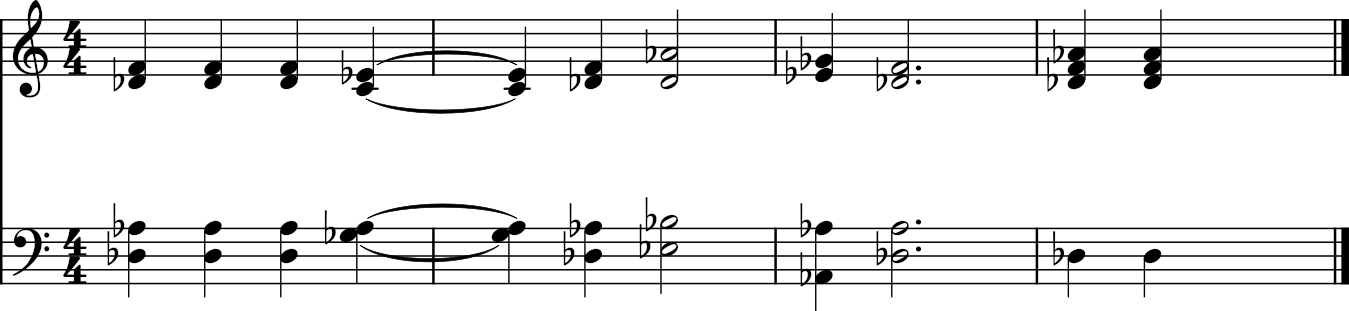

In [6]:
from music21 import stream, note, chord, meter, clef

score = stream.Score()

# Setup Staves
top_staff = stream.Part()
top_staff.append(clef.TrebleClef())
bottom_staff = stream.Part()
bottom_staff.append(clef.BassClef())

music_data = music_is[:10]

for pitches, dur in music_data:
    treble_notes = []
    bass_notes = []
    
    for p in pitches:
        # Convert string to a pitch object to check its octave
        pitch_obj = note.Pitch(p)
        
        # If the note is lower than C4 (Middle C), send to bass staff
        if pitch_obj.ps < 60: # 60 is the MIDI number for C4
            bass_notes.append(p)
        else:
            treble_notes.append(p)
    
    # Add to Treble Staff (as Chord or Note)
    if treble_notes:
        c_upper = chord.Chord(treble_notes)
        c_upper.quarterLength = dur
        top_staff.append(c_upper)
        
    # Add to Bass Staff (as Chord or Note)
    if bass_notes:
        c_lower = chord.Chord(bass_notes)
        c_lower.quarterLength = dur
        bottom_staff.append(c_lower)

# Clean up measures and assemble
top_staff.makeMeasures(inPlace=True)
bottom_staff.makeMeasures(inPlace=True)
score.insert(0, top_staff)
score.insert(0, bottom_staff)

score.show()

In [7]:
import sys
print(sys.executable)

c:\Users\Asamoah\Desktop\kofi\venv\Scripts\python.exe
